In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
print(f'Tensorflow_version: {tf.__version__}\nKeras: {keras.__version__}')
import matplotlib.pyplot as plt
import numpy as np
import random


Tensorflow_version: 2.18.0
Keras: 3.6.0


# 1. Load data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
unique_values = np.unique(y_train)
print("Các giá trị unique trong y_train:", unique_values)

Các giá trị unique trong y_train: [0 1 2 3 4 5 6 7 8 9]


In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

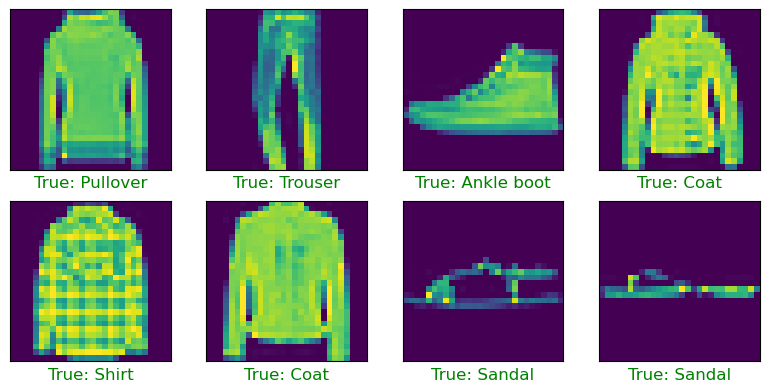

In [6]:

def plot_data(x_data : np.ndarray, y_data: np.ndarray):
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize = (8,4))

    len_x = x_data.shape[0]
    for idx in range(nrows*ncols):
        ax = axes[idx // ncols, idx % ncols]-
        img_idx = random.randint(0, len_x)        
        ax.imshow(x_data[img_idx])
        ax.set(xticks = [], yticks = [])

        true_labels_str = f'True: {class_names[y_data[img_idx]]}'
        ax.set_xlabel(true_labels_str, color = 'green', fontsize = 12)
    plt.tight_layout()
    plt.show()
    
plot_data(x_train, y_train)

# 2 Image Pre-processing

In [7]:
x_train, x_teat = x_train/255, x_test/255

In [8]:
 x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
 x_train.shape

(60000, 28, 28, 1)

# 3. Network (ANN) Architecture

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28, 1)),
    MaxPooling2D(pool_size = (2,2)),


    Flatten(),
    
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax'),
    
    
])



In [29]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [30]:
history = model.fit(x_train, y_train,
                   epochs = 5,
                   batch_size = 128,validation_split = 0.1

)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 118ms/step - accuracy: 0.7692 - loss: 0.6687 - val_accuracy: 0.8730 - val_loss: 0.3445
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 65ms/step - accuracy: 0.8910 - loss: 0.3108 - val_accuracy: 0.8933 - val_loss: 0.3015
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.9034 - loss: 0.2702 - val_accuracy: 0.9037 - val_loss: 0.2734
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9159 - loss: 0.2346 - val_accuracy: 0.9097 - val_loss: 0.2564
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9229 - loss: 0.2149 - val_accuracy: 0.9047 - val_loss: 0.2711


In [32]:
history_dict = history.history

In [33]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']

In [52]:
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

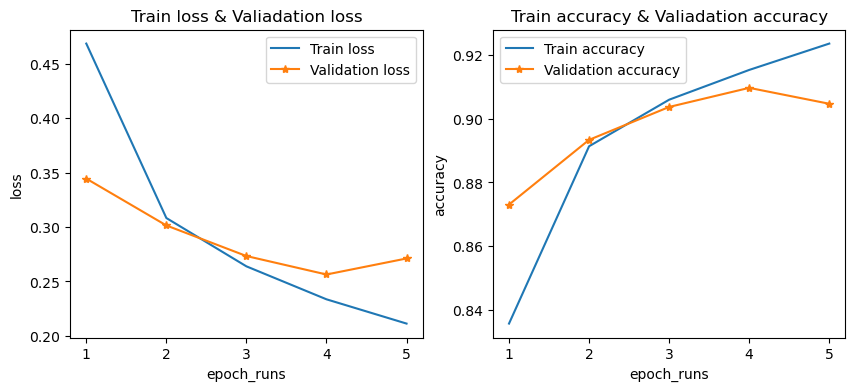

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
epoch_runs = [1+x for x in range(5)]
ax1.plot(epoch_runs, train_loss, label = 'Train loss')
ax1.plot(epoch_runs, val_loss, marker = '*', label = 'Validation loss')
ax1.set_title('Train loss & Valiadation loss')
ax1.set_xlabel('epoch_runs')
ax1.set_ylabel('loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label = 'Train accuracy')
ax2.plot(epoch_runs, val_acc, marker = '*', label = 'Validation accuracy')
ax2.set_title('Train accuracy & Valiadation accuracy')
ax2.set_xlabel('epoch_runs')
ax2.set_ylabel('accuracy')
ax2.legend()



# Model Evaluation

In [60]:
score = model.evaluate(x_test, y_test)
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8067 - loss: 93.5752


[92.68550109863281, 0.8061000108718872]

In [ ]:
print(f'Test loss : {score[0]:.4f}')
print(f'Test accuracy : {score[1]:.4f}')


# 5. Prediction